`torchvision` - Base Domain Library for Pytorch Computer Vision.

`torchvision.datasets` - Get Datasets and data loading functions for computer vision here. 

`torchvision.models` - Get pre-trained computer vision models that you can leverage for your own problems.

`torchvision.transforms` - Functions for manipulating your vision data (images) to be suitable for use with 
                               an ML model.
                               
`torch.utils.data.Dataset` - Base dataset class for Pytorch.

`torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import os

In [23]:
# writing a device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


# 1. Getting a Dataset

The dataset we are using is Fashion MNIST Dataset from torchvision.datasets

In [2]:
train_data = datasets.FashionMNIST(root = "Datasets", train = True, download = True, 
                                   transform = transforms.ToTensor(),   # how do want to transform the data
                                   target_transform = None) # How do we want to transforms the label/targets?


test_data = datasets.FashionMNIST(root = "Datasets", train = False, download = True, 
                                   transform = transforms.ToTensor(),   # how do want to transform the data
                                   target_transform = None) # How do we want to transforms the label/targets?

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

# 2. Check the Shape of Data

In [8]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

# 3. Visualize the Dataset

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
image.squeeze().shape

torch.Size([28, 28])

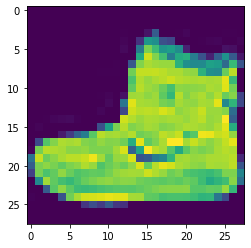

In [11]:
image, label = train_data[0]
plt.imshow(image.squeeze())   # squeeze to get rid of that extra dimension that is channel dimension
plt.show()

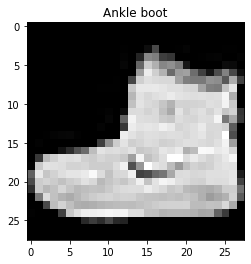

In [12]:
plt.imshow(image.squeeze(), cmap = "gray")  
plt.title(train_data.classes[label])
plt.show()

# 4. Prepare DataLoader

Right now, our data is in the form of Pytorch Datasets.

DataLoader turns our dataset into a Python iterable.

More Specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

     1) It is more computationally efficient, as in, your computing hardware may not be able to look (store in               memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
     
     2) It gives our neural network more chances to update its gradients per epoch.

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: Datasets
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: Datasets
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [14]:
BATCH_SIZE = 32

# Turn datasets into iterables (batches)

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8f1b888df0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8fb4966f70>)

In [15]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [16]:
60000/32, 10000/32

(1875.0, 312.5)

# 5. Building a CNN Model

In [82]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, 
                      kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                      kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
            )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                      kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                      kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
            )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 7*7,  # 7*7 is output of conv_block_2 
                      out_features = output_shape)
            )
            
    def forward(self, x):
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        #print(f"Output shape of Classifier Block: {x.shape}")
        return x

In [83]:
image.shape

torch.Size([1, 28, 28])

In [84]:
model_2 = FashionMNISTModelV2(input_shape = 1, hidden_units = 16, output_shape = 10).to(device)

In [85]:
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

## Testing our model with a dummy data if its producing the expected results we need...

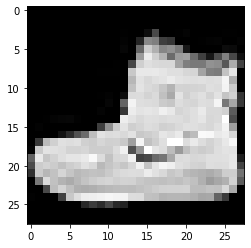

In [86]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.show()

In [87]:
image.shape, image.unsqueeze(0).shape

(torch.Size([1, 28, 28]), torch.Size([1, 1, 28, 28]))

In [88]:
model_2(image.unsqueeze(0))

tensor([[-0.0046, -0.0083,  0.0235,  0.0210,  0.0022, -0.0099,  0.0320, -0.0186,
          0.0157,  0.0329]], grad_fn=<AddmmBackward0>)

## Our model is working fine, lets go ahead...

## 6. Setup Loss function, Optimizer, Accuracy

In [89]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                        lr = 0.01)

# 7. Training and Testing `model_2` using our training and testing functions

In [90]:
def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss, train_acc = 0, 0
    
    model.train()   # training mode ON
    
    
    # Add a loop to loop through training batches
    for batch, (X, Y) in enumerate(data_loader):
        
        X, Y = X.to(device), Y.to(device)
        
        # 1. Forward pass
        Y_pred = model(X)
        
        # 2. Calculate loss (per batch)
        
        loss = loss_fn(Y_pred, Y)
        train_loss += loss 
        train_acc += accuracy_fn(y_true = Y, y_pred = Y_pred.argmax(dim = 1))
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # Optimizer step
        optimizer.step()
        
    
    # Divide total train_loss and acc by length of train_dataloader
    train_loss /= len(data_loader)   # finding ot avg train loss
    train_acc /= len(data_loader)    # finding ot avg train acc

    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

In [91]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    
    test_loss, test_acc = 0, 0
    
    model.eval()  # put the model in Eval
    
    with torch.inference_mode():
        for X,Y in data_loader:
            X, Y = X.to(device), Y.to(device)
            
            # 1. Forward Pass
            test_pred = model(X)
            
            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, Y)
            test_acc += accuracy_fn(y_true = Y, y_pred = test_pred.argmax(dim = 1))
            
            
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%\n")

In [92]:
# Start the training and testing
from tqdm import tqdm

EPOCHS = 5

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model = model_2,
               data_loader = train_dataloader,
               loss = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    
    test_step(model = model_2,
              data_loader = test_dataloader,
              loss = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)

  0%|                                                     | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 1.15565 | Train Acc: 59.21%


 20%|█████████                                    | 1/5 [00:33<02:14, 33.59s/it]

Test Loss: 0.65610 | Test Acc: 75.88%

Epoch: 1
---------
Train Loss: 0.49731 | Train Acc: 81.97%


 40%|██████████████████                           | 2/5 [01:05<01:38, 32.69s/it]

Test Loss: 0.46956 | Test Acc: 82.91%

Epoch: 2
---------
Train Loss: 0.41449 | Train Acc: 85.19%


 60%|███████████████████████████                  | 3/5 [01:38<01:05, 32.73s/it]

Test Loss: 0.42197 | Test Acc: 84.92%

Epoch: 3
---------
Train Loss: 0.37598 | Train Acc: 86.55%


 80%|████████████████████████████████████         | 4/5 [02:10<00:32, 32.36s/it]

Test Loss: 0.38714 | Test Acc: 86.06%

Epoch: 4
---------
Train Loss: 0.35068 | Train Acc: 87.36%


100%|█████████████████████████████████████████████| 5/5 [02:44<00:00, 32.82s/it]

Test Loss: 0.39713 | Test Acc: 86.48%



# Our CNN Model is giving us better results than non-linear model we created in Previous Part !!!

# 8. Make and Evaluate random predictions

In [93]:
def make_predictions(model, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim = 0).to(device)
            
            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)
            
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
            
            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
        # Stack the pred_probs to turn list into a tensor
        return torch.stack(pred_probs)

In [98]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [106]:
# getting 10 random test samples to test and predict
import random
random.seed(42)
test_imgs = []
test_labels = []

for img, label in random.sample(list(test_data), k = 9):
    test_imgs.append(img)
    test_labels.append(label)
    
# View the first sample shape
test_imgs[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

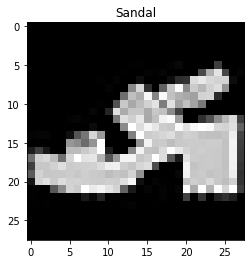

In [121]:
plt.imshow(test_imgs[0].squeeze(), cmap = "gray")
plt.title(test_data.classes[test_labels[0]])

In [125]:
# Make predictions
pred_probs = make_predictions(model = model_2, data = test_imgs)

# View First two pred prob
pred_probs[:2]

tensor([[8.7415e-09, 5.3526e-09, 2.8128e-10, 3.6997e-10, 1.4046e-10, 9.9942e-01,
         1.1205e-08, 2.3395e-06, 8.7648e-06, 5.7026e-04],
        [6.1229e-03, 9.1772e-01, 1.5600e-04, 7.1372e-02, 1.3636e-03, 2.0569e-06,
         3.1765e-03, 5.9564e-06, 8.3188e-05, 6.4555e-07]])

In [126]:
# Convert prediction prob to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

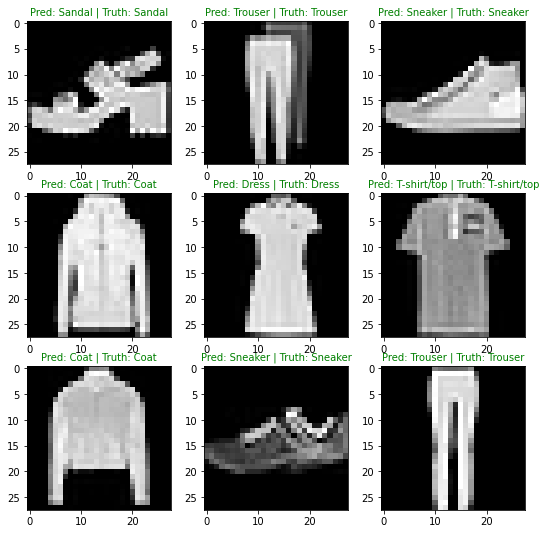

In [128]:
# Plot Predictions
plt.figure(figsize = (9, 9))

nrows = 3
ncols = 3

for i, sample in enumerate(test_imgs):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap = "gray")
    
    # Find the prediction (in text form, e.g "Sandal")
    pred_label = test_data.classes[pred_classes[i]]
    
    # Get the truth label (in text form)
    truth_label = test_data.classes[test_labels[i]]
    
    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10, c = "g")  # Green text if predictions same as truth
    else:
        plt.title(title_text, fontsize = 10, c = "r")